<a href="https://colab.research.google.com/github/ynusinovich/streamflow-prediction/blob/main/HYSETS_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import xarray as xr
import pandas as pd
import numpy as np

In [ ]:
# load watershed properties
wsp_full = pd.read_csv('/content/drive/My Drive/Streamflow Data/HYSETS_watershed_properties.txt')
full_len = wsp_full.shape[0]
# drop useless columns or columns with lots of NaNs
wsp_full['Flag_Natural_Boundaries'] = 1-wsp_full['Flag_Artificial_Boundaries']
wsp_full.drop(columns=['Drainage_Area_GSIM_km2', 'Flag_GSIM_boundaries', 'Flag_Artificial_Boundaries'], inplace=True)
flag_cols = ['Flag_ALL']; wsp_full['Flag_ALL'] = 1
for col in wsp_full.columns:
    if col.startswith('Flag_') and col != 'Flag_ALL':
        wsp_full['Flag_ALL'] &= wsp_full[col]
        flag_cols.append(col)

# select geographic box
wsp_full = wsp_full[ (wsp_full['Centroid_Lat_deg_N'] >= 49)   & (wsp_full['Centroid_Lat_deg_N'] <= 54) & \
                     (wsp_full['Centroid_Lon_deg_E'] >= -114) & (wsp_full['Centroid_Lon_deg_E'] <= -97) ]
# narrow basin size
wsp_full = wsp_full[ (wsp_full['Drainage_Area_km2'] >= 500) & (wsp_full['Drainage_Area_km2'] <= 5000) ]

# check for missing values
print('Data Columns (before trimming):')
str_cols = []
for col in wsp_full.columns:
    vals = wsp_full[col].values
    if np.issubdtype(vals.dtype, np.floating) or np.issubdtype(vals.dtype, np.integer):        
        #print(col, end=' ')
        print(col, np.isnan(vals).mean(), np.nanmin(vals), np.nanmax(vals), np.nanmean(vals), np.nanstd(vals), )
    else:
        str_cols.append(col)
print('\nString Columns:', *str_cols)

# drop rows (watersheds) with missing meta data
wsp = wsp_full[wsp_full['Flag_ALL']==1]
wsp.dropna(axis='index', inplace=True) # this is actually unnecessary
wsp_len = wsp.shape[0]

# check how much was dropped
print('\nRemaining data (after trimming):', wsp_len/full_len)

# drop columns not used for training: flags, strings and some others
drop_cols = ['Centroid_Lon_deg_E', 'Hydrometric_station_latitude', 'Hydrometric_station_longitude'] + flag_cols + str_cols
print('\nDropping columns for traing data:\n', *drop_cols)
wsp_train = wsp.drop(columns=drop_cols, inplace=False)
wsp_train

Data Columns (before trimming):
Watershed_ID 0.0 865 2365 1086.7142857142858 157.36271956916633
Centroid_Lat_deg_N 0.0 49.01667 53.94861 51.380360446428575 1.4889724676286162
Centroid_Lon_deg_E 0.0 -113.9735 -97.03747 -105.99542026785714 5.908923601227073
Drainage_Area_km2 0.0 500.0 4999.1315 1494.4375973214285 965.065408752962
Elevation_m 0.0 249.0 1838.1 665.2098214285714 267.3052117763985
Slope_deg 0.0 0.1753 22.5613 1.3345571428571428 2.457788791660761
Gravelius 0.0 1.2267 2.4878 1.7591955357142857 0.27868648456015715
Perimeter 0.0 108.088 554.536 231.2801875 93.44642323063398
Flag_Shape_Extraction 0.0 1 1 1.0 0.0
Aspect_deg 0.0 7.7093 351.8674 126.51639999999998 92.63303884857115
Flag_Terrain_Extraction 0.0 1 1 1.0 0.0
Land_Use_Forest_frac 0.0 0.0001 0.8572 0.19039107142857142 0.22280744150882661
Land_Use_Grass_frac 0.0 0.0 0.8704 0.09595624999999999 0.15013511699064494
Land_Use_Wetland_frac 0.0 0.0002 0.443 0.02738482142857143 0.060527572244009814
Land_Use_Water_frac 0.0 0.0017 0

,Watershed_ID,Centroid_Lat_deg_N,Drainage_Area_km2,Elevation_m,Slope_deg,Gravelius,Perimeter,Aspect_deg,Land_Use_Forest_frac,Land_Use_Grass_frac,Land_Use_Wetland_frac,Land_Use_Water_frac,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Permeability_logk_m2,Porosity_frac
864,865,49.75476,2509.8584,1262.0,5.7682,1.6076,283.798,118.6022,0.2480,0.3854,0.0077,0.0104,0.0203,0.0719,0.2563,0.0000,-15.262326,0.186644
866,867,50.20417,3490.0697,1034.6,1.2383,1.8040,375.464,105.8134,0.0079,0.0923,0.0029,0.0233,0.0343,0.0104,0.8288,0.0000,-15.200000,0.190000
867,868,50.35417,791.6734,1026.4,0.6497,1.4250,141.224,163.4672,0.0009,0.0117,0.0003,0.0405,0.0392,0.0025,0.9049,0.0000,-15.200000,0.190000
868,869,49.11366,612.6766,1838.1,22.5613,1.6875,147.343,287.0749,0.5341,0.2608,0.0026,0.0382,0.0065,0.1510,0.0011,0.0057,-15.231325,0.106944
876,877,49.72870,3584.4565,1382.8,8.0552,1.7799,375.794,61.3698,0.2013,0.2598,0.0158,0.0201,0.0207,0.0675,0.4126,0.0022,-15.359595,0.160534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1230,50.32722,641.0558,256.3,0.2838,1.2551,111.934,112.7949,0.1996,0.1074,0.0525,0.0184,0.0380,0.0226,0.5614,0.0000,-11.800000,0.060000
1272,1273,50.96472,1236.7307,252.9,0.2952,1.6384,202.881,78.8539,0.2345,0.1281,0.0277,0.0369,0.0293,0.0272,0.5162,0.0000,-11.803577,0.060137
1273,1274,51.35617,1706.3842,258.5,0.4215,1.5097,219.568,49.3099,0.4043,0.1775,0.0465,0.0450,0.0189,0.0409,0.2668,0.0000,-11.800000,0.060000
1282,1283,53.82222,4608.2667,250.6,0.4621,1.9778,472.422,285.1954,0.4783,0.0148,0.3903,0.0707,0.0005,0.0455,0.0000,0.0000,-14.072029,0.012667


In [ ]:
lcrop = False
# load NetCDF file lazily
xds = xr.open_dataset('/content/drive/My Drive/Streamflow Data/HYSETS_2020_QC_stations_mod1.nc', chunks={'watershed':1})
# assign watershed IDs as watershed coordinates (instead of simple integer index)
xds = xds.assign_coords(watershed=xds.watershedID.astype(np.int32,))
# use watershed IDs to slice out watersheds of interest
if lcrop: 
    xds = xds.sel(watershed=wsp['Watershed_ID'].values)
# load properties into memory
for var in xds.data_vars.values():
    if var.ndim == 1:
        var.load()
xds

<xarray.Dataset>
Dimensions:                     (time: 25202, watershed: 14425)
Coordinates:
  * time                        (time) datetime64[ns] 1950-01-01 ... 2018-12-31
  * watershed                   (watershed) int32 1 2 3 4 ... 14423 14424 14425
Data variables: (12/13)
    watershedID                 (watershed) float64 1.0 2.0 ... 1.442e+04
    drainage_area               (watershed) float64 1.47e+04 1.359e+03 ... 421.1
    drainage_area_GSIM          (watershed) float64 nan nan ... nan nan
    flag_GSIM_boundaries        (watershed) float64 0.0 0.0 1.0 ... 0.0 0.0 0.0
    flag_artificial_boundaries  (watershed) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    centroid_lat                (watershed) float64 47.26 47.21 ... 21.85 20.96
    ...                          ...
    elevation                   (watershed) float64 362.3 353.4 ... 2.179e+03
    slope                       (watershed) float64 3.533 4.663 ... 12.1 5.944
    discharge                   (watershed, time) float32 dask.array<chunksize=(1, 25202), meta=np.ndarray>
    pr                          (watershed, time) float32 dask.array<chunksize=(1, 25202), meta=np.ndarray>
    tasmax                      (watershed, time) float32 dask.array<chunksize=(1, 25202), meta=np.ndarray>
    tasmin                      (watershed, time) float32 dask.array<chunksize=(1, 25202), meta=np.ndarray>
Attributes: (12/13)
    title:          Hydrometeorological Sandbox of the École de technologie s...
    summary:        Hydrometeorological Sandbox of the École de technologie s...
    institution:    Hydrology, Climate and Climate Change Laboratory (HC3) at...
    institute_id:   HC3-ETS
    contact:        Richard Arsenault: richard.arsenault@etsmtl.ca
    date_created:   2020-05-26
    ...             ...
    featureType:    timeSeries
    cdm_data_type:  station
    license:        ODC-BY
    keywords:       HYSETS, GHCND, GSIM, hydrology, North America, streamflow...
    conventions:    CF-1.6, ACDD-1.3
    activity:       HYSETS

In [ ]:
# create data availability mask
# xds = xds.load()
xds['data_mask'] = ~( np.isnan(xds.discharge) | np.isnan(xds.pr) | np.isnan(xds.tasmax) | np.isnan(xds.tasmax) ).compute()
xds

<xarray.Dataset>
Dimensions:                     (time: 25202, watershed: 14425)
Coordinates:
  * time                        (time) datetime64[ns] 1950-01-01 ... 2018-12-31
  * watershed                   (watershed) int32 1 2 3 4 ... 14423 14424 14425
Data variables: (12/14)
    watershedID                 (watershed) float64 1.0 2.0 ... 1.442e+04
    drainage_area               (watershed) float64 1.47e+04 1.359e+03 ... 421.1
    drainage_area_GSIM          (watershed) float64 nan nan ... nan nan
    flag_GSIM_boundaries        (watershed) float64 0.0 0.0 1.0 ... 0.0 0.0 0.0
    flag_artificial_boundaries  (watershed) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    centroid_lat                (watershed) float64 47.26 47.21 ... 21.85 20.96
    ...                          ...
    slope                       (watershed) float64 3.533 4.663 ... 12.1 5.944
    discharge                   (watershed, time) float32 dask.array<chunksize=(1, 25202), meta=np.ndarray>
    pr                          (watershed, time) float32 dask.array<chunksize=(1, 25202), meta=np.ndarray>
    tasmax                      (watershed, time) float32 dask.array<chunksize=(1, 25202), meta=np.ndarray>
    tasmin                      (watershed, time) float32 dask.array<chunksize=(1, 25202), meta=np.ndarray>
    data_mask                   (watershed, time) bool True True ... False False
Attributes: (12/13)
    title:          Hydrometeorological Sandbox of the École de technologie s...
    summary:        Hydrometeorological Sandbox of the École de technologie s...
    institution:    Hydrology, Climate and Climate Change Laboratory (HC3) at...
    institute_id:   HC3-ETS
    contact:        Richard Arsenault: richard.arsenault@etsmtl.ca
    date_created:   2020-05-26
    ...             ...
    featureType:    timeSeries
    cdm_data_type:  station
    license:        ODC-BY
    keywords:       HYSETS, GHCND, GSIM, hydrology, North America, streamflow...
    conventions:    CF-1.6, ACDD-1.3
    activity:       HYSETS

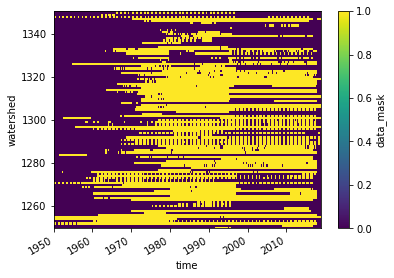

In [ ]:
# plot some data
xds.data_mask.loc[1250:1350,:].plot()

In [ ]:
# find consecutive blocks of at least 300 days
import numba

@numba.jit(numba.uint16[:,:](numba.boolean[:,:], numba.int64))
def consecutive_blocks(input, N=None):
    output = np.zeros(input.shape, dtype=np.uint16)
    nw,nt = input.shape
    for w in range(nw):
        c = 0
        for t in range(nt):
            if input[w,t] > 0:
                c += 1
                if c > N:
                    output[w,t] = c
                elif c == N:
                    output[w,(t-N+1):(t+1)] = np.arange(1,N+1, dtype=np.uint16)
            else:
                c = 0  # reset to zero at every interruption
    return output

In [ ]:
%%time
# compute block mask
N = 300
output = consecutive_blocks(input=xds.data_mask.values, N=N)
xds[f'mask_{N:03d}'] = xr.DataArray(data=output, dims=('watershed','time'))
xds

CPU times: user 921 ms, sys: 1.18 s, total: 2.1 s
Wall time: 2.49 s


<xarray.Dataset>
Dimensions:                     (time: 25202, watershed: 14425)
Coordinates:
  * time                        (time) datetime64[ns] 1950-01-01 ... 2018-12-31
  * watershed                   (watershed) int32 1 2 3 4 ... 14423 14424 14425
Data variables: (12/19)
    watershedID                 (watershed) float64 1.0 2.0 ... 1.442e+04
    drainage_area               (watershed) float64 1.47e+04 1.359e+03 ... 421.1
    drainage_area_GSIM          (watershed) float64 nan nan ... nan nan
    flag_GSIM_boundaries        (watershed) float64 0.0 0.0 1.0 ... 0.0 0.0 0.0
    flag_artificial_boundaries  (watershed) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    centroid_lat                (watershed) float64 47.26 47.21 ... 21.85 20.96
    ...                          ...
    data_mask                   (watershed, time) bool True True ... False False
    mask_300                    (watershed, time) uint16 1 2 3 4 5 ... 0 0 0 0 0
    discharge_diff              (watershed) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    pr_diff                     (watershed) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    tasmax_diff                 (watershed) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    tasmin_diff                 (watershed) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/13)
    title:          Hydrometeorological Sandbox of the École de technologie s...
    summary:        Hydrometeorological Sandbox of the École de technologie s...
    institution:    Hydrology, Climate and Climate Change Laboratory (HC3) at...
    institute_id:   HC3-ETS
    contact:        Richard Arsenault: richard.arsenault@etsmtl.ca
    date_created:   2020-05-26
    ...             ...
    featureType:    timeSeries
    cdm_data_type:  station
    license:        ODC-BY
    keywords:       HYSETS, GHCND, GSIM, hydrology, North America, streamflow...
    conventions:    CF-1.6, ACDD-1.3
    activity:       HYSETS

In [ ]:
# save to netcdf on google drive
default_enc = dict(chunksizes=(1, xds.time.size), shuffle=True, zlib=True, complevel=2)
var_enc = {name:default_enc for name,var in xds.data_vars.items() if var.ndim == 2}        

if 'nds' in locals(): nds.close()

if lcrop: new_filename = '/content/drive/My Drive/Streamflow Data/HYSETS_2020_QC_stations_mod2_crop.nc'
else: new_filename = '/content/drive/My Drive/Streamflow Data/HYSETS_2020_QC_stations_mod2.nc'
xds.to_netcdf(new_filename, mode='w', format='NETCDF4', encoding=var_enc, compute=True)

/usr/local/lib/python3.7/dist-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


In [ ]:
nds = xr.open_dataset(new_filename, chunks={'watershed':1})
nds

<xarray.Dataset>
Dimensions:                     (time: 25202, watershed: 14425)
Coordinates:
  * time                        (time) datetime64[ns] 1950-01-01 ... 2018-12-31
  * watershed                   (watershed) int32 1 2 3 4 ... 14423 14424 14425
Data variables: (12/19)
    watershedID                 (watershed) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    drainage_area               (watershed) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    drainage_area_GSIM          (watershed) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    flag_GSIM_boundaries        (watershed) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    flag_artificial_boundaries  (watershed) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    centroid_lat                (watershed) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    ...                          ...
    data_mask                   (watershed, time) bool dask.array<chunksize=(1, 25202), meta=np.ndarray>
    mask_300                    (watershed, time) uint16 dask.array<chunksize=(1, 25202), meta=np.ndarray>
    discharge_diff              (watershed) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    pr_diff                     (watershed) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    tasmax_diff                 (watershed) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    tasmin_diff                 (watershed) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/13)
    title:          Hydrometeorological Sandbox of the École de technologie s...
    summary:        Hydrometeorological Sandbox of the École de technologie s...
    institution:    Hydrology, Climate and Climate Change Laboratory (HC3) at...
    institute_id:   HC3-ETS
    contact:        Richard Arsenault: richard.arsenault@etsmtl.ca
    date_created:   2020-05-26
    ...             ...
    featureType:    timeSeries
    cdm_data_type:  station
    license:        ODC-BY
    keywords:       HYSETS, GHCND, GSIM, hydrology, North America, streamflow...
    conventions:    CF-1.6, ACDD-1.3
    activity:       HYSETS

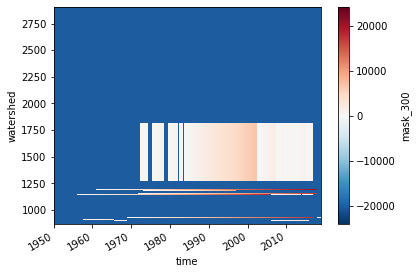

In [ ]:
# plot consectuve blocks of data
mask = nds.mask_300.sel(watershed=wsp['Watershed_ID'].values)
xr.where(mask == 0, -20000, mask).plot()

In [ ]:
# look for constant time-dependent values
zero_watersheds = dict()
for varname,var in xds.data_vars.items():
    if 'time' in var.dims and 'mask' not in varname:

        if varname+'_diff' in xds:
            r_diff = xds[varname+'_diff']
        else:
            r_min = var.min(dim='time')
            r_max = var.max(dim='time')
            r_diff = r_max - r_min
            xds[varname+'_diff'] = r_diff

        eqz = ( r_diff == 0 ).values
        print(f'Watersheds with constant values for "{varname}":', eqz.sum())

        zero_idx = np.argwhere(eqz,)
        zero_watersheds[varname] = zero_idx
        for idx in zero_idx:
            print(idx, xds.watershedID[idx].values, var[idx].mean().values)

Watersheds with constant values for "discharge": 7
[8572] [8573.] 0.0
[9651] [9652.] 0.0
[9745] [9746.] 0.0
[10207] [10208.] 0.0
[10209] [10210.] 0.0
[13997] [13998.] 0.0
[13999] [14000.] 0.0


/usr/local/lib/python3.7/dist-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


Watersheds with constant values for "pr": 1
[2311] [2312.] 0.0


/usr/local/lib/python3.7/dist-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


Watersheds with constant values for "tasmax": 0


/usr/local/lib/python3.7/dist-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


Watersheds with constant values for "tasmin": 0


In [ ]:
# where are these watersheds
for varname,zero_idx in zero_watersheds.items():

    print("   ***   ",varname,"   ***   ")
    for idx in zero_idx:
        print(wsp_full[wsp_full['Watershed_ID'] == xds.watershedID[idx].values[0]])
    print()